# Exercice : Classe de gestion de la balance sheet

Imaginez que vous travaillez pour une entreprise comptable et que vous devez créer une classe BalanceSheet pour gérer les informations financières de différentes entreprises. Voici les exigences pour la classe BalanceSheet :

La classe doit être initialisée avec un DataFrame Pandas contenant les informations de la balance sheet d'une entreprise. Chaque ligne du DataFrame représente un poste de la balance sheet avec les colonnes suivantes :

    - "Poste" : Le nom du poste de la balance sheet (par exemple, "Trésorerie", "Comptes Clients", "Dettes à Court Terme", etc.).
    - "Classe" : La classe à laquelle le poste appartient (par exemple, "Actifs Courants", "Passifs Courants", "Actifs Non Courants", "Passifs Non Courants", "Capitaux Propres", etc.).
    - "Compte" : Le numéro de compte associé au poste.
    - "Montant €" : Le montant en euros du poste.

1 - La classe doit avoir une méthode **calcule_total_classe** qui calcule la somme de tous les postes d'une classe donnée de la balance sheet (par exemple, la somme de tous les "Actifs Courants").

2 - La classe doit avoir une méthode **calcule_total_actif** qui calcule la somme de tous les actifs de la balance sheet (c'est-à-dire la somme des "Actifs Courants" et des "Actifs Non Courants").

3 - La classe doit avoir une méthode **calcule_total_passif** qui calcule la somme de tous les passifs de la balance sheet (c'est-à-dire la somme des "Passifs Courants", des "Passifs Non Courants" et des "Capitaux Propres").

4 - La classe doit avoir une méthode **calcule_ratio_endettement** qui calcule le ratio d'endettement de l'entreprise en divisant le total des passifs par le total des actifs.

5 - La classe doit avoir une méthode **get_poste_montant** qui permet de récupérer le montant d'un poste particulier de la balance sheet en donnant son nom de poste en argument.

6 - La classe doit avoir une méthode **get_liste_postes** qui renvoie la liste de tous les noms de postes de la balance sheet.

7 - La classe doit avoir une méthode **ajoute_poste** qui permet d'ajouter un nouveau poste à la balance sheet. ❌

8 - La classe doit avoir une méthode **retire_poste** qui permet de retirer un poste de la balance sheet. ❌

9 - La classe doit avoir une méthode **modifie_poste_montant** qui permet de modifier le montant d'un poste de la balance sheet. ❌

Créez la classe BalanceSheet avec ces méthodes et testez-la avec des exemples de balance sheets.

# Calculer des Ratios Financiers :
Ajoutez des méthodes pour calculer des ratios financiers tels que : 

    - Bénéfice net = Total des capitaux propres - Total de l'actif ✅
    - le ratio de liquidité (actifs courants / passifs courants) ✅
    - le ratio d'endettement (passifs totaux / actifs totaux)  ✅
    - le ratio de rentabilité (bénéfice net / actifs totaux)  ✅

# Générer des Graphiques :
Utilisez la bibliothèque Matplotlib ou Seaborn pour créer des graphiques visuels qui représentent vos données de bilan. Par exemple, 
    
    - un graphique en barres montrant la répartition des actifs par classe ✅
    - un graphique en ligne montrant l'évolution des actifs au fil du temps ❌
    - un graphique en camembert pour illustrer la structure du passif. ✅

# Analyse de Sensibilité :
**l'évolution des données financières au fil des ans**

Effectuez des analyses de sensibilité en modifiant certaines variables clés (comme le taux de croissance des ventes, les taux d'intérêt, etc.) pour évaluer leur impact sur les ratios financiers ou la performance globale de l'entreprise.


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Balance_sheet:
    
    def __init__(self, data):
        self.balance_sheet_data = data
    
    def calcule_total_classe(self, classe_cible):
        
        # groupby() pour regrouper les données par classe
        groupes = self.balance_sheet_data.groupby('Classe')
        
        # Utilisez sum() pour calculer la somme des valeurs pour la classe cible
        somme_classe_cible = groupes.get_group(classe_cible)['Montant €'].sum()

        return somme_classe_cible

    def calcule_total_actif(self):
        return self.calcule_total_classe('Actifs Courants') + self.calcule_total_classe('Actifs Non Courants')

    def calcule_total_passif(self):
        return self.calcule_total_classe('Passifs Courants') + self.calcule_total_classe('Passifs Non Courants') + self.calcule_total_classe('Capitaux Propres') 
                    
    def calcule_ratio_endettement(self):
        return self.calcule_total_passif()/self.calcule_total_actif()

    def calcule_ratio_liquidité(self):
        return self.calcule_total_classe('Actifs Courants')/self.calcule_total_classe('Passifs Courants')
    
    #Bénéfice net = Total des capitaux propres - Total de l'actif

    def benefic_net(self):
        return self.calcule_total_classe('Capitaux Propres') - self.calcule_total_actif()
    
    def calcule_ratio_rentabilite(self):
        return self.benefic_net() / self.calcule_total_actif()
    
    def get_poste_montant(self, poste):
        montant = self.balance_sheet_data['Montant €'][self.balance_sheet_data['Poste'] == poste]
        if not montant.empty:
            return montant.iloc[0]
        else:
            return None

    def get_liste_postes(self):
        return self.balance_sheet_data['Poste']

# visualisation 
    def create_passif_pie_chart(self):
        # Sélectionnez uniquement les lignes correspondant au passif
        passif_df = self.balance_sheet_data[self.balance_sheet_data['Classe'].str.contains('Passifs Courants|Passifs Non Courants')][['Classe', 'Montant €']]
        passif_grouped = passif_df.groupby('Classe')['Montant €'].sum()
        print(passif_grouped)
        labels = passif_grouped.index
        values = passif_grouped.values
        plt.figure(figsize=(8, 8))
        plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
        plt.title('Structure du Passif')
        plt.show()
        
    def plot_actifs_par_classe(self):
        # Création un sous-DataFrame contenant uniquement les colonnes 'Classe' et 'Montant €' pour les actifs
        actifs_df = self.balance_sheet_data[self.balance_sheet_data['Classe'].str.contains('Actifs Courants|Actifs Non Courants')][['Classe', 'Montant €']]
        print(actifs_df)
        
        actifs_grouped = actifs_df.groupby('Classe')['Montant €'].sum()
        actifs_grouped
        fig, ax = plt.subplots(figsize=(10, 6))
        actifs_grouped.plot(kind='bar', ax=ax)

        # Ajout des étiquettes aux axes et au titre
        ax.set_xlabel('Classe')
        ax.set_ylabel('Montant €')
        ax.set_title('Répartition des Actifs par Classe')
        plt.xticks(rotation=45)  
        plt.tight_layout()  
        plt.show()

    
        

In [172]:
# Créez un DataFrame de test
data = pd.DataFrame({'Identifiant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 14],
        'Poste': [
            'Immobilisations incorporelles',
            'Immobilisations corporelles',
            'Immobilisations financières',
            'Stocks',
            'Créances clients',
            'Disponibilités en banque',
            'Disponibilités en caisse',
            'Capital',
            'Réserves',
            "Résultat de l'exercice",
            'Emprunts',
            'Dettes fournisseurs',
            'Dettes fiscales et sociales',
            'Autres dettes'
        ],
        'Classe': [
            'Actifs Non Courants',
            'Actifs Non Courants',
            'Actifs Non Courants',
            'Actifs Courants',
            'Actifs Courants',
            'Actifs Courants',
            'Actifs Courants',
            'Capitaux Propres',
            'Capitaux Propres',
            'Capitaux Propres',
            'Passifs Non Courants',
            'Passifs Courants',
            'Passifs Courants',
            'Passifs Courants'
        ],
        'Montant €': [
            1000,
            82000,
            0,
            1000,
            0,
            2000,
            300,
            30000,
            10000,
            24300,
            16000,
            2000,
            3500,
            500
        ]})

balance_sheet = Balance_sheet(data)

In [173]:
data

,Identifiant,Poste,Classe,Montant €
0,1,Immobilisations incorporelles,Actifs Non Courants,1000
1,2,Immobilisations corporelles,Actifs Non Courants,82000
2,3,Immobilisations financières,Actifs Non Courants,0
3,4,Stocks,Actifs Courants,1000
4,5,Créances clients,Actifs Courants,0
5,6,Disponibilités en banque,Actifs Courants,2000
6,7,Disponibilités en caisse,Actifs Courants,300
7,8,Capital,Capitaux Propres,30000
8,9,Réserves,Capitaux Propres,10000
9,10,Résultat de l'exercice,Capitaux Propres,24300


In [174]:
# Appelez les méthodes de la classe Balance_sheet

total_actif_courant = balance_sheet.calcule_total_classe('Actifs Courants')
total_actif_non_courant = balance_sheet.calcule_total_classe('Actifs Non Courants')
total_passif_courant = balance_sheet.calcule_total_classe('Passifs Courants')
total_passif_non_courant = balance_sheet.calcule_total_classe('Passifs Non Courants')
total_capitaux_propres = balance_sheet.calcule_total_classe('Capitaux Propres')
total_actif = balance_sheet.calcule_total_actif()
total_passif = balance_sheet.calcule_total_passif()
ratio_endettement = balance_sheet.calcule_ratio_endettement()
ratio_rentabilite = balance_sheet.calcule_ratio_rentabilite()
ratio_liquidité = balance_sheet.calcule_ratio_liquidité()

#Bénéfice net

benefice_net = balance_sheet.benefic_net()

#poste_montant = balance_sheet.get_poste_montant('Trésorerie')

liste_postes = balance_sheet.get_liste_postes()

# Affichez les résultats
print("Total Actif Courant:", total_actif_courant)
print("\n")
print("Total Actif Non Courant:", total_actif_non_courant)
print("\n")
print("Total Passif Courant:", total_passif_courant)
print("\n")
print("Total Passif Non Courant:", total_passif_non_courant)
print("\n")
print("Total Capitaux Propres:", total_capitaux_propres)
print("\n")
print("Total Actif:", total_actif)
print("\n")
print("Total Passif:", total_passif)
print("\n")
print("Ratio d'Endettement:", ratio_endettement)
print("\n")
print("Montant du bénéfice net :", benefice_net)
print("\n")
print("Ratio d'rentabilité:", ratio_rentabilite)
print("\n")
print("Ratio de liquidité:", ratio_liquidité)
print("\n")


Total Actif Courant: 3300


Total Actif Non Courant: 83000


Total Passif Courant: 6000


Total Passif Non Courant: 16000


Total Capitaux Propres: 64300


Total Actif: 86300


Total Passif: 86300


Ratio d'Endettement: 1.0


Montant du bénéfice net : -22000


Ratio d'rentabilité: -0.2549246813441483


Ratio de liquidité: 0.55




In [175]:
print("Liste des Postes:\n", liste_postes)


Liste des Postes:
 0     Immobilisations incorporelles
1       Immobilisations corporelles
2       Immobilisations financières
3                            Stocks
4                  Créances clients
5          Disponibilités en banque
6          Disponibilités en caisse
7                           Capital
8                          Réserves
9            Résultat de l'exercice
10                         Emprunts
11              Dettes fournisseurs
12      Dettes fiscales et sociales
13                    Autres dettes
Name: Poste, dtype: object


                Classe  Montant €
0  Actifs Non Courants       1000
1  Actifs Non Courants      82000
2  Actifs Non Courants          0
3      Actifs Courants       1000
4      Actifs Courants          0
5      Actifs Courants       2000
6      Actifs Courants        300


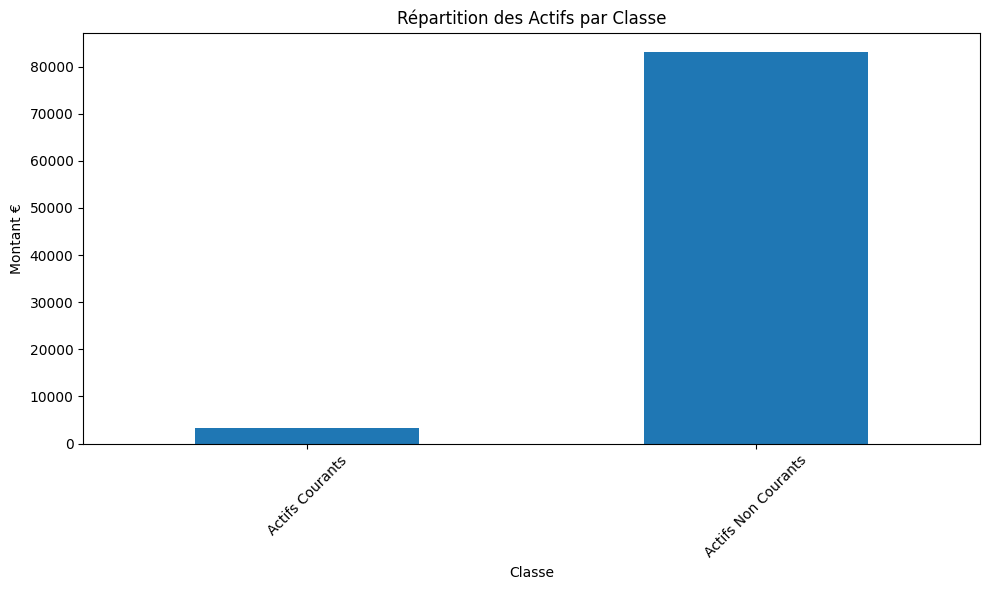

In [176]:
balance_sheet.plot_actifs_par_classe()

Classe
Passifs Courants         6000
Passifs Non Courants    16000
Name: Montant €, dtype: int64


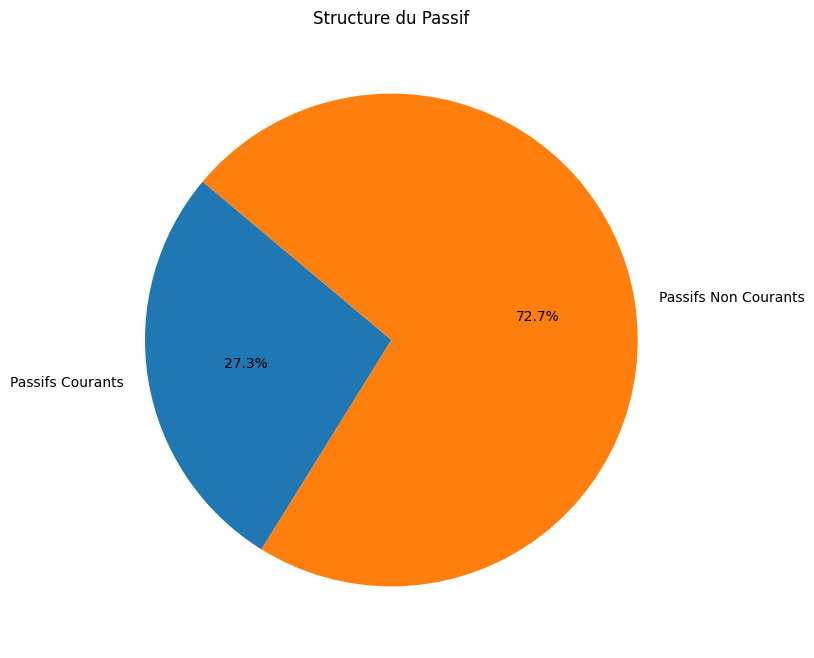

In [177]:
balance_sheet.create_passif_pie_chart()

In [7]:
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import pandas as pd
import random

# Création des années et des taux de croissance aléatoires
annees = [2018, 2019, 2020, 2021, 2022]
taux_croissance_ventes = [random.uniform(0.05, 0.1) for _ in annees]
taux_interet = [random.uniform(0.03, 0.06) for _ in annees]

# Création des données financières
data = {
    'Année': annees,
    'Taux de Croissance des Ventes': taux_croissance_ventes,
    'Taux d\'Intérêt': taux_interet,
    'Chiffre d\'affaires (CA)': [random.randint(1000000, 2000000) for _ in annees],
    'Bénéfice net': [random.randint(100000, 400000) for _ in annees],
    'Actifs totaux': [random.randint(800000, 1200000) for _ in annees],
    'Passifs totaux': [random.randint(600000, 900000) for _ in annees]
}

# Création de la DataFrame
df = pd.DataFrame(data)
df['Rentabilité'] = (df['Bénéfice net'] / df['Chiffre d\'affaires (CA)']) * 100
df['Endettement'] = (df['Passifs totaux'] / df['Actifs totaux']) * 100


df


,Année,Taux de Croissance des Ventes,Taux d'Intérêt,Chiffre d'affaires (CA),Bénéfice net,Actifs totaux,Passifs totaux,Rentabilité,Endettement
0,2018,0.063152,0.053958,1391923,111190,909683,827059,7.988229,90.917276
1,2019,0.081937,0.035691,1712115,328593,851250,888306,19.192227,104.353128
2,2020,0.067548,0.053692,1722519,113576,1078202,762724,6.593599,70.740362
3,2021,0.091954,0.059651,1670312,344199,1123419,835734,20.606869,74.392012
4,2022,0.081554,0.042100,1175393,211811,1188185,801316,18.020441,67.440340


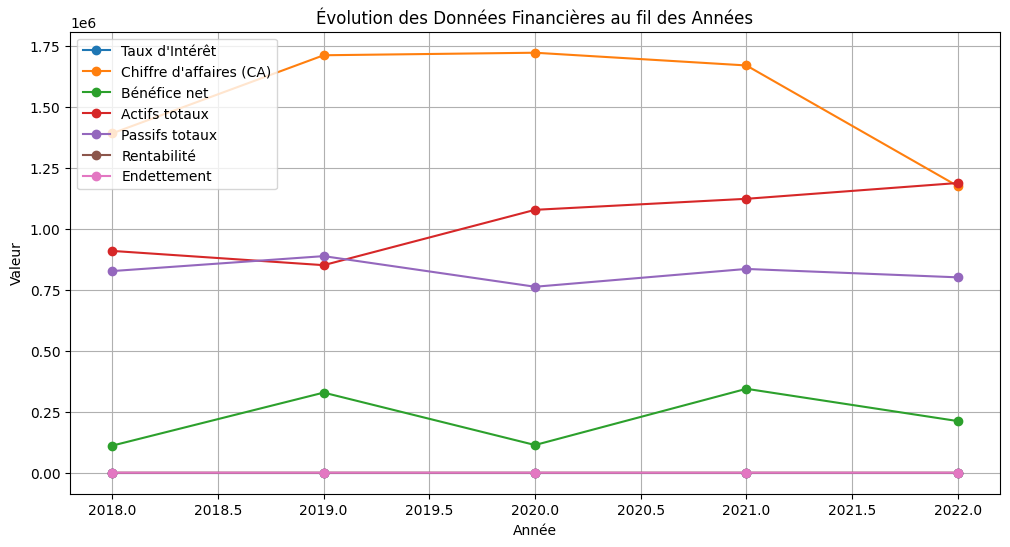

In [8]:
# Liste des colonnes à afficher sur le graphique
colonnes = df.columns[2:]  # Excluez les deux premières colonnes (Année et Taux de Croissance des Ventes)

# Créez le graphique
plt.figure(figsize=(12, 6))
for colonne in colonnes:
    plt.plot(df['Année'], df[colonne], marker='o', label=colonne)

plt.title('Évolution des Données Financières au fil des Années')
plt.xlabel('Année')
plt.ylabel('Valeur')
plt.grid(True)
plt.legend()
plt.show()


# Analyse de Tendances :
Ajoutez des méthodes pour analyser les tendances au fil du temps en utilisant des données de bilans successifs. Par exemple, calculez la croissance des actifs ou des passifs d'une année à l'autre et affichez ces tendances sous forme de graphiques.

# Analyse de Sensibilité :
Effectuez des analyses de sensibilité en modifiant certaines variables clés (comme le taux de croissance des ventes, les taux d'intérêt, etc.) pour évaluer leur impact sur les ratios financiers ou la performance globale de l'entreprise.

# Modélisation Financière :
Si vous avez des connaissances en modélisation financière, envisagez de créer des modèles financiers pour prévoir la performance financière future de l'entreprise. Vous pouvez également intégrer ces modèles à votre classe pour automatiser les prévisions.

# Tests Statistiques :
Utilisez des tests statistiques (comme le test t de Student) pour évaluer si certaines valeurs dans votre bilan sont significativement différentes de la moyenne ou si des groupes de valeurs sont corrélés.

# Intégration de Données Externes :
Enrichissez vos données de bilan en les associant à des données externes, telles que les taux de change, les indices boursiers ou d'autres indicateurs économiques. Vous pouvez ajouter des méthodes pour importer, fusionner et analyser ces données externes.

# Visualisation Géographique :
Si votre entreprise opère dans plusieurs régions ou pays, créez des cartes géographiques pour visualiser la répartition géographique de vos actifs, passifs ou revenus. Utilisez des bibliothèques comme Folium pour créer des cartes interactives.